# Logistic regression with Neural Network approach

Logistic regression can be seen as the simplest kind of neural network:
* Input features are fed to one node
* Forward propagation (linear representation + sigmoid activation function) to get prediction
* Cost calculation
* Backward propagation to get derivatives
* Gradient descent to update weights and bias in order to minimize cost

It is a good example to get an initial feeling of how neural networks operate.

In [7]:
# Imports
import numpy as np

import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from logistic_model import LogisticModel

In [5]:
# Generate synthetic data
X, y = dt.make_classification(n_samples=10000, n_features=10, n_informative=6, n_redundant=4, random_state=42)

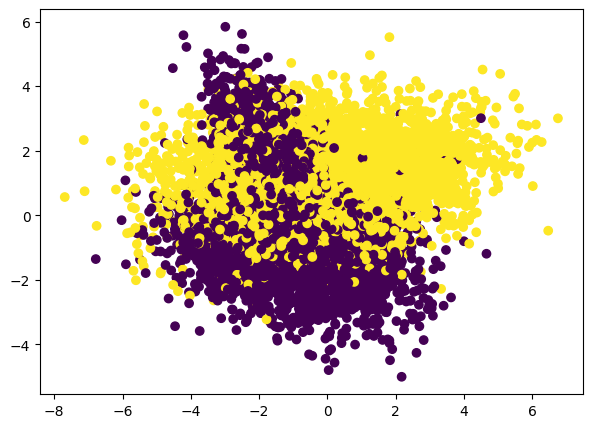

In [12]:
# Plot first two features with label
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0], X[:, 1], c=y)